In [199]:
import pandas as pd
import os

In [200]:
A=list([file.split(".")[0] for file in os.listdir('./') if ".txt" in file ])
A.remove('')
A.sort()

In [201]:
Base_Table=pd.read_table(A[0]+".txt",delimiter='\t',header=None)
Final_table={}
Final_table['Taxonomy']=list(Base_Table[0])
for Sample in A:
    Final_table[Sample]=[]

In [202]:
for Sample in A:
    Temp_Table=pd.read_table(Sample+".txt",delimiter='\t',header=None).set_index(0)
    for taxon in Final_table['Taxonomy']:
        Final_table[Sample].append(Temp_Table.loc[taxon,1])
        

In [203]:
FT=pd.DataFrame(Final_table)

In [204]:
FT.set_index("Taxonomy",inplace=True)

In [205]:
FT=FT[FT.sum(axis=1)>10000]

In [206]:
FT.to_csv('Clean_Table_Not_Normalized.csv')

In [207]:
FT.reset_index(inplace=True)

In [208]:
Rank=FT.groupby(list(map(len,FT['Taxonomy'].str.split('|'))))

In [209]:
Domain=Rank.get_group(1).set_index('Taxonomy')

In [210]:
Phylum=Rank.get_group(2).set_index("Taxonomy")

In [211]:
Class=Rank.get_group(3).set_index("Taxonomy")

In [212]:
Order=Rank.get_group(4).set_index("Taxonomy")

In [213]:
Family=Rank.get_group(5).set_index("Taxonomy")

In [214]:
Group=Rank.get_group(6).set_index("Taxonomy")

In [215]:
Species=Rank.get_group(7).set_index("Taxonomy")

In [216]:
Inds=["Control_328","Control_330","Control_327",
      "DSS_334","DSS_339","RCE_322","RCE_318","RCE_319"
      ,"RCE_plus_DSS_305","RCE_plus_DSS_313","RCE_plus_DSS_301"]

In [236]:
Phylum_Inds=Phylum.loc[:,Inds]
Class_Inds=Class.loc[:,Inds]
Order_Inds=Order.loc[:,Inds]
Family_Inds=Family.loc[:,Inds]
Group_Inds=Group.loc[:,Inds]
Species_Inds=Species.loc[:,Inds]

In [237]:
To_Write=[Phylum,Class,Order,Family,Group,Species,Phylum_Inds,Class_Inds,Order_Inds,Family_Inds,Group_Inds,Species_Inds]

In [238]:
Names="Phylum,Class,Order,Family,Group,Species,Phylum_Inds,Class_Inds,Order_Inds,Family_Inds,Group_Inds,Species_Inds".split(",")

In [239]:
for index,file in enumerate(To_Write):
    file.to_csv("Cleaned_Tables/"+Names[index]+'.csv')

In [240]:
Species_TSS=Species.copy()
Group_TSS=Group.copy()
Family_TSS=Family.copy()
Phylum_TSS=Phylum.copy()


In [241]:
for i in range(Species_TSS.shape[1]):
    Species_TSS.iloc[:,i]=Species_TSS.iloc[:,i]/Species_TSS.iloc[:,i].sum()*100
for i in range(Group_TSS.shape[1]):
    Group_TSS.iloc[:,i]=Group_TSS.iloc[:,i]/Group_TSS.iloc[:,i].sum()*100
for i in range(Family_TSS.shape[1]):
    Family_TSS.iloc[:,i]=Family_TSS.iloc[:,i]/Family_TSS.iloc[:,i].sum()*100
for i in range(Phylum_TSS.shape[1]):
    Phylum_TSS.iloc[:,i]=Phylum_TSS.iloc[:,i]/Phylum_TSS.iloc[:,i].sum()*100

In [102]:
Species_TSS.to_csv("Species_TSS.csv")
Group_TSS.to_csv("Group_TSS.csv")
Family_TSS.to_csv("Family_TSS.csv")
Phylum_TSS.to_csv("Phylum_TSS.csv")


In [48]:
Normalized_Table=pd.read_table("Cleaned_Tables/Species_Normalized.txt",delimiter='\t')

In [169]:
Desired_Species=["d__Bacteria|p__Firmicutes|c__Clostridia|o__Eubacteriales|f__Lachnospiraceae|g__Roseburia|s__Roseburia intestinalis",
                 "d__Bacteria|p__Firmicutes|c__Clostridia|o__Eubacteriales|f__Lachnospiraceae|g__Roseburia|s__Roseburia hominis",
                "d__Bacteria|p__Firmicutes|c__Clostridia|o__Eubacteriales|f__Oscillospiraceae|g__Faecalibacterium|s__Faecalibacterium prausnitzii",
                "d__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia muciniphila",
                "d__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus johnsonii",
                "d__Bacteria|p__Actinobacteria|c__Actinomycetia|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudolongum"]
Filtered_Norm_T=Normalized_Table[Normalized_Table["Taxon"].isin(Desired_Species)]


In [230]:
New_DF={"Species":[],"Control":[],"DSS":[],"RCJ":[],"RCJ_Plus_DSS":[]}

In [231]:
New_DF["Species"]=Desired_Species

In [232]:
Filtered_Norm_T.set

KeyError: "None of ['Taxon'] are in the columns"

In [173]:
for sp in Desired_Species:
    New_DF["Control"].append(Filtered_Norm_T.loc[sp,["Control_327","Control_328","Control_330","D_Control"]].median())
    New_DF["DSS"].append(Filtered_Norm_T.loc[sp,["DSS_334","DSS_339","DSS_treatedp","D_DSS"]].median())
    New_DF["RCJ"].append(Filtered_Norm_T.loc[sp,["D_RCE","RCE_318","RCE_319","RCE_322"]].median())
    New_DF["RCJ_Plus_DSS"].append(Filtered_Norm_T.loc[sp,["D_RCE_plus_DSS","RCE_plus_DSS_301","RCE_plus_DSS_305","RCE_plus_DSS_313"]].median())
Tag_Names=list(["_".join(items.split('|')[-1:]).strip("s__") for items in Desired_Species ])

New_DF["Species"]=Tag_Names    

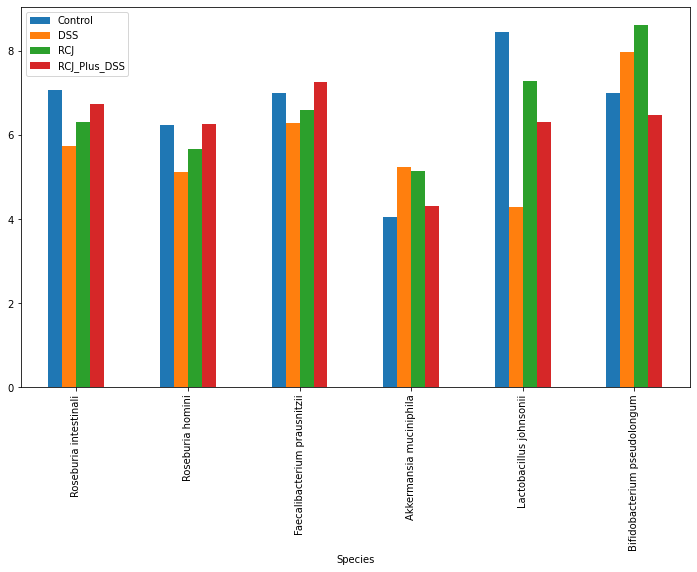

In [186]:
ax=pd.DataFrame(New_DF).set_index("Species").plot.bar(figsize=(12, 7)).legend(loc='upper left')
fig = ax.get_figure()
fig.savefig("Individual_CSS.png")

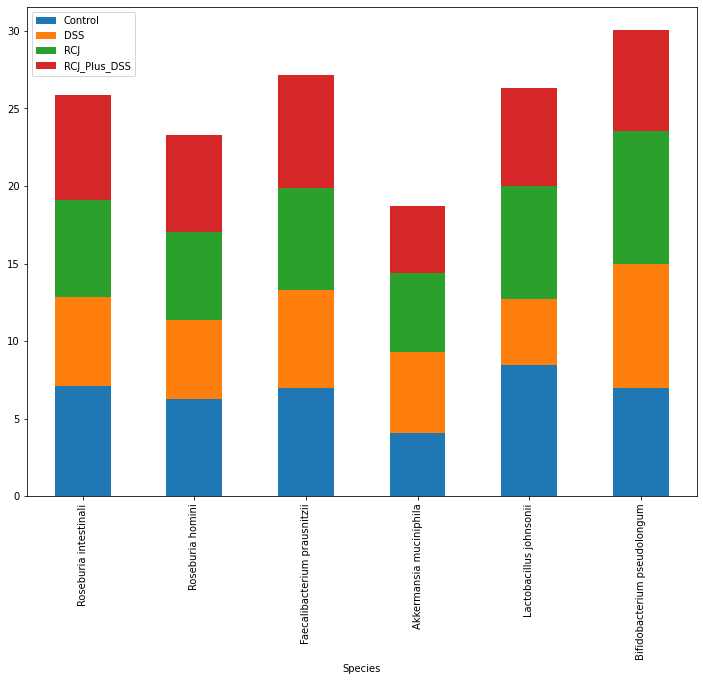

In [188]:
ax=pd.DataFrame(New_DF).set_index("Species").plot.bar(stacked=True,figsize=(12, 9)).legend(loc='upper left')
fig = ax.get_figure()
fig.savefig("Stacked_CSS.png")

In [242]:
Species_TSS.reset_index(inplace=True)

In [243]:
Filtered_Norm_T_TSS=Species_TSS[Species_TSS["Taxonomy"].isin(Desired_Species)]

In [244]:
New_DF_TSS={"Species":[],"Control":[],"DSS":[],"RCJ":[],"RCJ_Plus_DSS":[]}

In [245]:
New_DF_TSS["Species"]=Desired_Species

In [246]:
Filtered_Norm_T_TSS.set_index("Taxonomy",inplace=True)

In [247]:
for sp in Desired_Species:
    New_DF_TSS["Control"].append(Filtered_Norm_T_TSS.loc[sp,["Control_327","Control_328","Control_330","D_Control"]].median())
    New_DF_TSS["DSS"].append(Filtered_Norm_T_TSS.loc[sp,["DSS_334","DSS_339","DSS_treatedp","D_DSS"]].median())
    New_DF_TSS["RCJ"].append(Filtered_Norm_T_TSS.loc[sp,["D_RCE","RCE_318","RCE_319","RCE_322"]].median())
    New_DF_TSS["RCJ_Plus_DSS"].append(Filtered_Norm_T_TSS.loc[sp,["D_RCE_plus_DSS","RCE_plus_DSS_301","RCE_plus_DSS_305","RCE_plus_DSS_313"]].median())
New_DF_TSS["Species"]=Tag_Names    

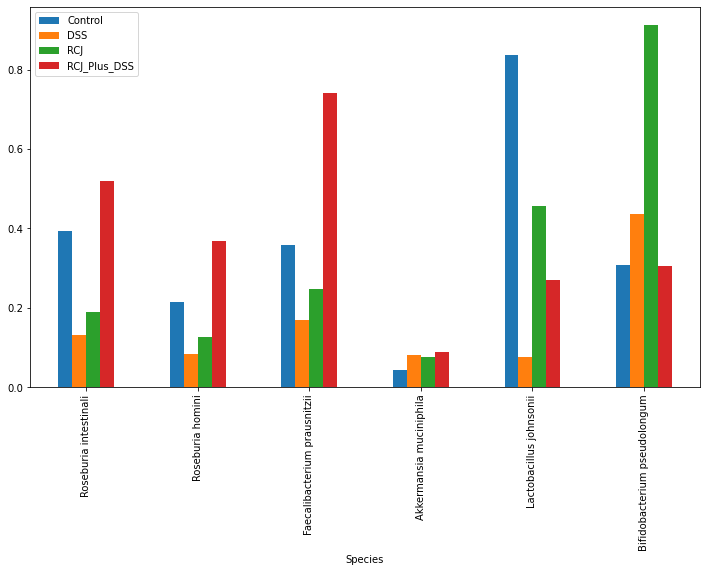

In [249]:
ax=pd.DataFrame(New_DF_TSS).set_index("Species").plot.bar(figsize=(12, 7)).legend(loc='upper left')
fig = ax.get_figure()
fig.savefig("Individual_TSS.png")

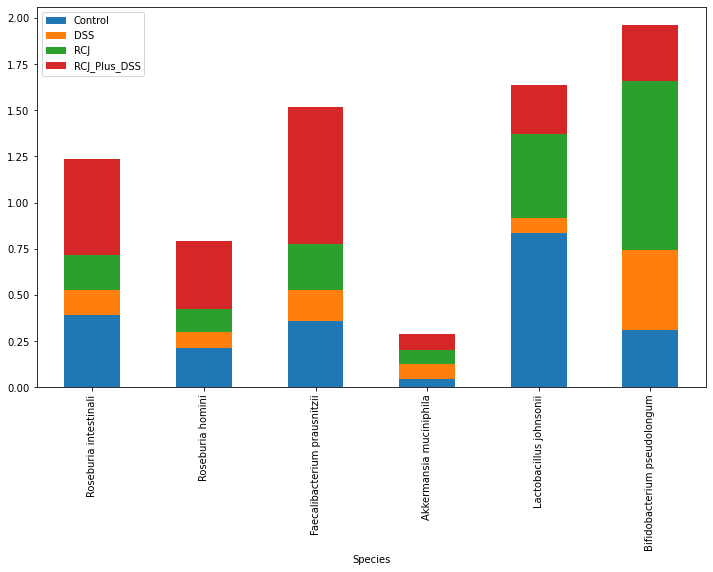

In [250]:
ax=pd.DataFrame(New_DF_TSS).set_index("Species").plot.bar(stacked=True,figsize=(12, 7)).legend(loc='upper left')
fig = ax.get_figure()
fig.savefig("Stacked_TSS.png")